To add the environment kernel to jupyter: https://stackoverflow.com/questions/39604271/conda-environments-not-showing-up-in-jupyter-notebook


# Data Sources

Transfermarkt is a football database with a wide range of statistics for major international tournaments. Game results are available for most tournaments, but more advanced statistics such as team market value are only available for more recent tournaments. This leaves us with the following data sources:

* European Championships (every 4 years, starting 2008) - 31, 31, 51 matches
* FIFA World Cup (every 4 years, starting 2006) - 64 matches each
* Copa America (every 4 years, starting 2011) - 26 matches each
* CONCACAF Gold Cup (every 2 years, starting 2011) - 26, 25 matches
* AFC Asian Cup (every 4 years, starting 2011)  - 32 matches each
* Africa Cup (every 2 years, starting 2013) - 32 matches each
* OFC Nations Cup (every 4 years, no data)
    
568 matches in total.

Qualification games will not be used as training data.

## Transfermarkt
Example: FIFA world cup 2006
https://www.transfermarkt.de/weltmeisterschaft-2006/startseite/pokalwettbewerb/WM06/saison_id/2005 (1)
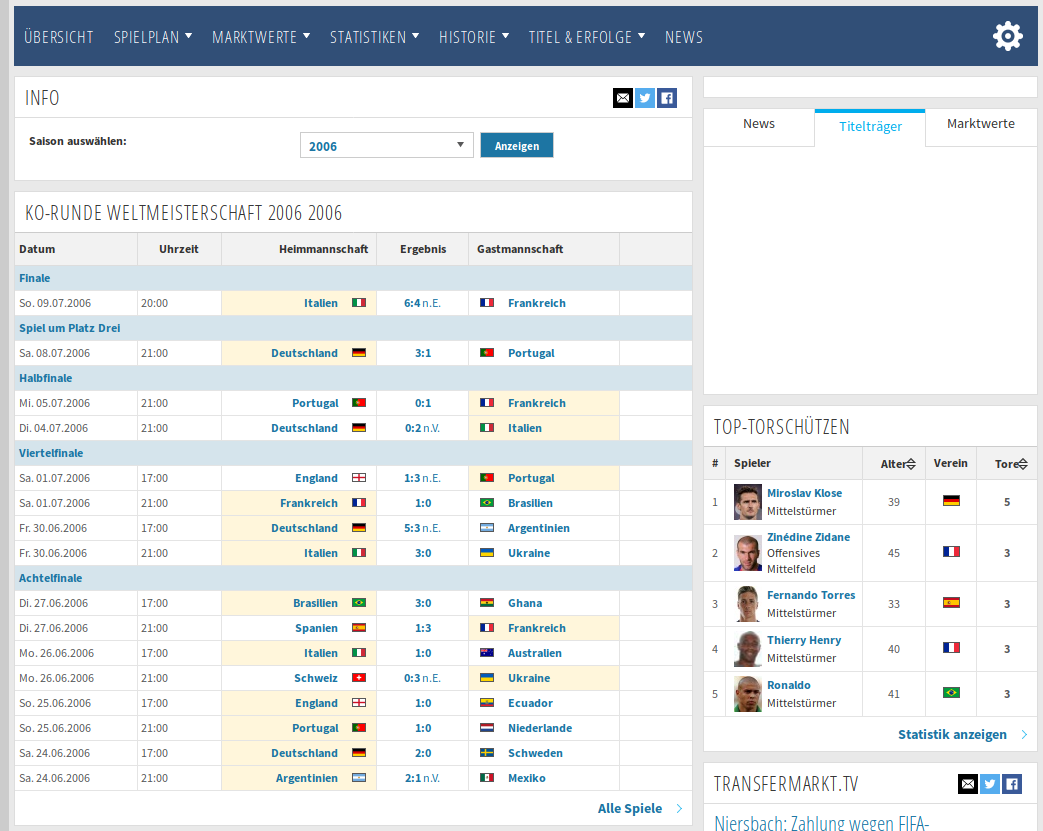
From this list of matches it is possible to navigate to the respective match report which contains lineup details
https://www.transfermarkt.de/italien_frankreich/aufstellung/spielbericht/53491 (2)
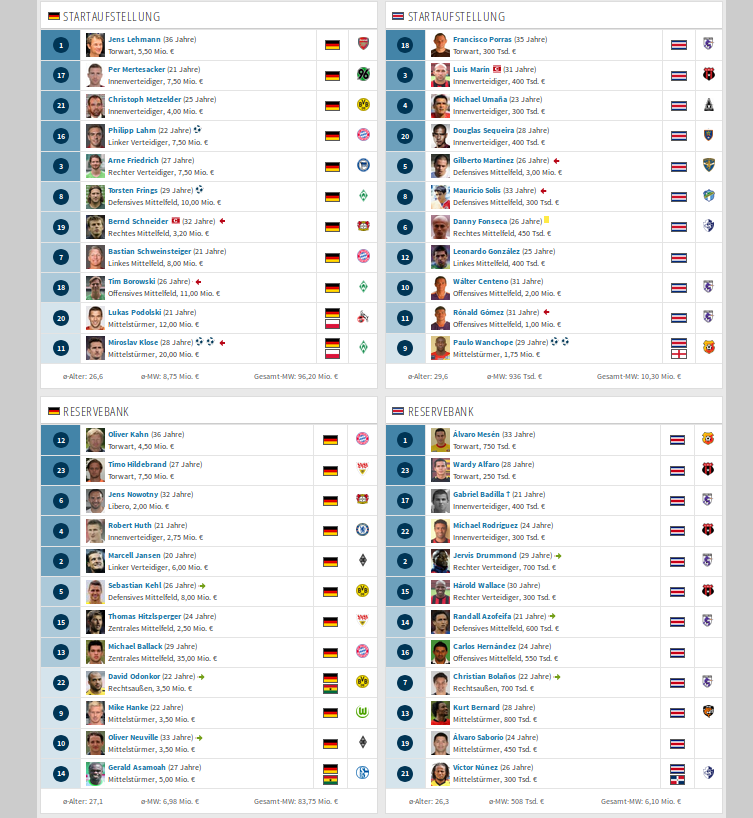

The lineup includes information on
* Player age
* Player value
* Player club
* Player position

In case more data is needed such as the results of past encounters between two teams, it is possible to navigate to the team comparison page
https://www.transfermarkt.de/vergleich/bilanzdetail/verein/3437/gegner_id/3262 (3)
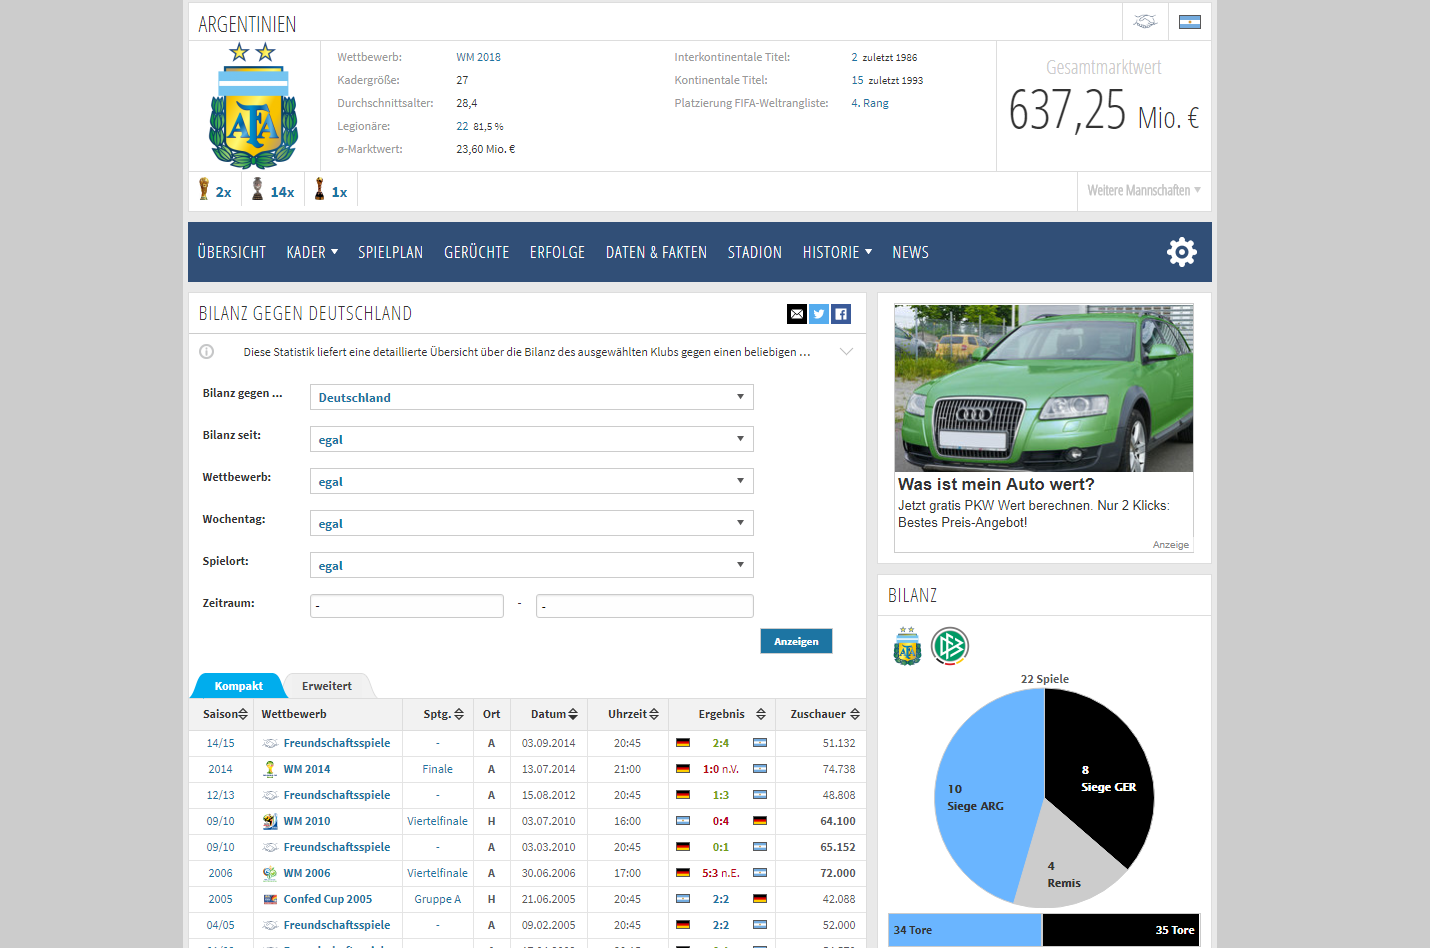

## Scraping
We will scrape each tournament page (1) for the match results and the IDs for the match report (2) and team comparison links (3).
From the match report lineups, we will extract all available player stats. We will not further navigate to the player pages (they only offer current information, not the information available at the time of the tournament). From the team comparison page, we will retrieve a list of past encounters.

The python library scrapy is used.

The scraper coding is in the folder transfermarkt. The folder structure of the scrapy project was created with the command line `scrapy startproject transfermarkt`. There are three crawlers in the folder `transfermarkt/transfermarkt/spiders`:
* `gamelist.py` gets a list of all game results of a tournament 
* `match.py` gets the lineup data per game
* `comparison.py` gets the past encounters between two teams

Before starting the scrapers, create the following folder structure:
* `output` for the gamelist files (on the same level 
  * `output/matches` for the lineup files
  * `output/compare` for the comparison files. 

To scrape the game results, type `scrapy crawl gamelist` in the command line. Once the scraper is done, the lineup details can be scraped with `scrapy crawl match` and the comparisons with `scrapy crawl comparison`.